<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/4_5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%A0%81%EC%9A%A9%ED%95%B4%EB%B3%B4%EA%B8%B0(clothes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'hojunnn'
os.environ['KAGGLE_KEY'] = 'd4271b12660538c66718e87a2c67b22b'

In [ ]:
!kaggle datasets download -d airplane2230/apparel-image-dataset-2

Dataset URL: https://www.kaggle.com/datasets/airplane2230/apparel-image-dataset-2
License(s): CC0-1.0
 97% 241M/249M [00:01<00:00, 154MB/s]
100% 249M/249M [00:01<00:00, 162MB/s]


In [ ]:
import os
import zipfile
os.mkdir('/content/csv_data')

In [ ]:
with zipfile.ZipFile('/content/apparel-image-dataset-2.zip', 'r') as existing_zip:
    existing_zip.extractall('/content/csv_data/nocolorinfo')

In [ ]:
# 데이터 불러오기

In [ ]:
import pandas as pd

DATA_PATH = '/content/csv_data/nocolorinfo'

train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')
train_df.head()

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_df['image'] = DATA_PATH + train_df['image'].apply(lambda x: str(x).replace('\\', '/')[1:])
val_df['image'] = DATA_PATH + val_df['image'].apply(lambda x: str(x).replace('\\', '/')[1:])
test_df['image'] = DATA_PATH + test_df['image'].apply(lambda x: str(x).replace('\\', '/')[1:])

del train_df['Unnamed: 0']
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
del val_df['Unnamed: 0']
val_df.head(2)

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,/content/csv_data/nocolorinfo/clothes_dataset/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,/content/csv_data/nocolorinfo/clothes_dataset/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


/content/csv_data/nocolorinfo/clothes_dataset/blue_shorts/256d854b55ac32ea4d0d6398dffccc4d8909a388.jpg


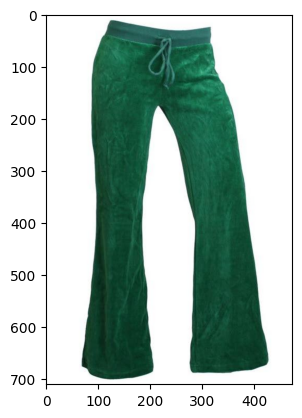

In [ ]:
import matplotlib.image as mping
import matplotlib.pyplot as plt

print(train_df.iloc[0]['image'])
img = mping.imread(train_df.iloc[2]['image'])
plt.imshow(img)

In [ ]:
import numpy as np
from PIL import Image
img = Image.open(train_df.iloc[2]['image'])
imgArray = np.array(img)
print(imgArray.shape)

(711, 474, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input # Import Input here

model = Sequential()
model.add(Input(shape=(112,112,3)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
from typing_extensions import dataclass_transform
batch_size = 32
class_col = ['black','blue','brown','green','red','white',
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

# class_col = train_df.columns[1:]
#Make Generator
# class_mode : ['categorical', ['binary','sparse'], ['raw', 'multi_output'], ['input','None']]

train_generator = train_datagen.flow_from_dataframe(
    dataframe= train_df, # dataframe : 사용할 데이터 프레임 전달
    directory = '', # directory 이미지가 존재하는 폴더 경로를 전달
    x_col = 'image',
    y_col = class_col, #X_col, y 데이터프레임에서 학습에 사용할 데이터가 존재하는 열과 레이블이 존재하는
    target_size = (112,112), # 이미지 크기를 전달받은 크기로 조절
    color_mode='rgb',
    class_mode='raw', # 이진분류(binary), 다중분류(cateforical), 다중 레이블 분류
    batch_size = batch_size,
    shuffle = True,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory = '',
    x_col = 'image',
    y_col = class_col,
    target_size = (112,112),
    color_mode='rgb',
    class_mode='raw',
    batch_size = batch_size,
    shuffle = True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [ ]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [ ]:
history = model.fit(train_generator,
          steps_per_epoch=get_steps(len(train_df), batch_size),
          validation_data=val_generator,
          epochs=10)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - acc: 0.5234 - loss: 0.2066 - val_acc: 0.5675 - val_loss: 0.2133
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5675 - val_loss: 0.2133
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - acc: 0.5721 - loss: 0.1925 - val_acc: 0.5257 - val_loss: 0.2070
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5257 - val_loss: 0.2070
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 36s 155ms/step - acc: 0.5622 - loss: 0.1872 - val_acc: 0.6265 - val_loss: 0.1989
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.6265 - val_loss: 0.1989
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 31s 173ms/step - acc: 0.5942 - loss: 0.1664 - val_acc: 0.5529 - val_loss: 0.2401
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5529 - val_loss: 0.2401
Epoch 9/

In [ ]:
model.fit(train_generator,
          validation_data=val_generator,
          epochs=10)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - acc: 0.6059 - loss: 0.1649 - val_acc: 0.6161 - val_loss: 0.1864
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - acc: 0.6077 - loss: 0.1489 - val_acc: 0.5320 - val_loss: 0.1907
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - acc: 0.5954 - loss: 0.1594 - val_acc: 0.6315 - val_loss: 0.1935
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - acc: 0.6223 - loss: 0.1457 - val_acc: 0.6340 - val_loss: 0.2012
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - acc: 0.6248 - loss: 0.1400 - val_acc: 0.5897 - val_loss: 0.1999
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - acc: 0.6010 - loss: 0.1414 - val_acc: 0.6027 - val_loss: 0.1986
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - acc: 0.6350 - loss: 0.1244 - val_acc: 0.6023 - val_loss: 0.1728
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 31s 175ms/step - acc: 0.6423 - loss: 0.1275 - val_acc: 0.5859 - val_loss: 0.1758
Epoch 9/10
175/175 ━━━━━━━━━━━━━

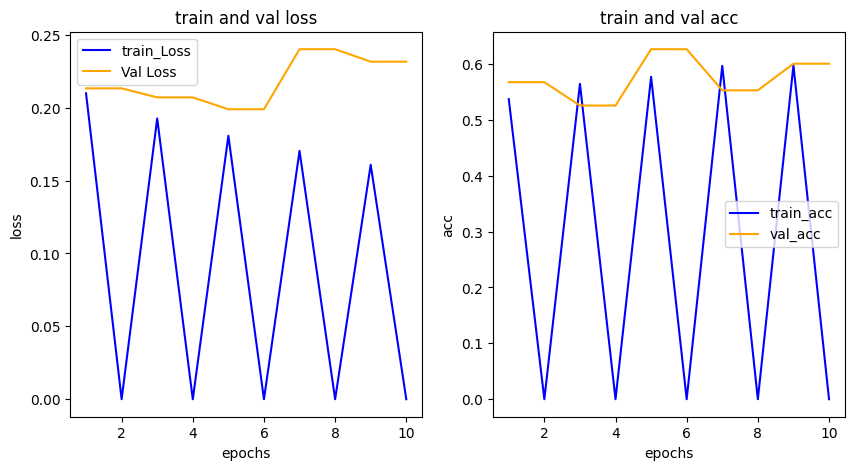

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 테스트 데이터 예측하기

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory = None,
    x_col = 'image',
    y_col = None,
    target_size = (112,112),
    color_mode='rgb',
    class_mode=None,
    batch_size = batch_size,
    shuffle = False
)

Found 3416 validated image filenames.


In [ ]:
preds = model.predict(test_generator,
                      verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 14s 125ms/step


In [ ]:
preds.shape

(3416, 11)

In [ ]:
preds[0]

array([5.3737015e-03, 2.6001698e-01, 2.0927142e-02, 1.5069471e-02,
       1.2640888e-03, 3.6196455e-01, 7.3052594e-05, 3.2423981e-03,
       5.6922942e-01, 1.2796949e-01, 1.2757714e-01], dtype=float32)

In [ ]:
class_col

['black',
 'blue',
 'brown',
 'green',
 'red',
 'white',
 'dress',
 'shirt',
 'pants',
 'shorts',
 'shoes']

In [ ]:
prob = zip(class_col, list(preds[1]))
prob

In [ ]:
sorted(list(prob), key=lambda z: z[1], reverse=True)

[('pants', 0.9997239),
 ('black', 0.96102864),
 ('green', 0.077676415),
 ('brown', 0.0063838954),
 ('blue', 0.005634693),
 ('shorts', 0.0023774747),
 ('shoes', 0.00028634776),
 ('shirt', 4.7530913e-05),
 ('red', 3.4501766e-06),
 ('white', 1.4145583e-07),
 ('dress', 4.27656e-09)]

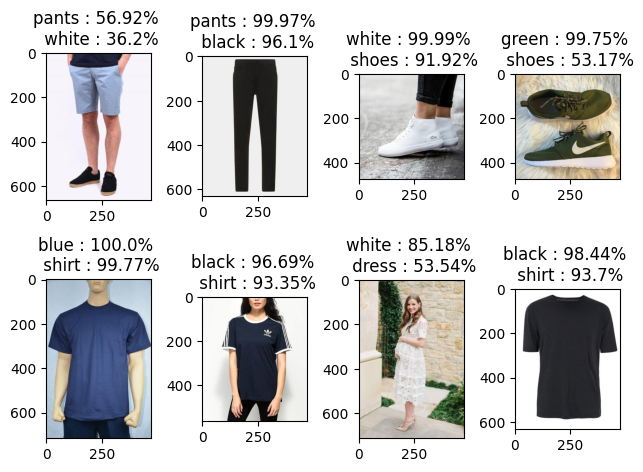

In [ ]:
import matplotlib.pyplot as plt
import cv2
do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i+1)
    prob = zip(class_col, list(pred))
    prob = sorted(list(prob), key=lambda z: z[1], reverse=True)[:2]

    image = cv2.imread(test_df.iloc[i]['image'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f'{prob[0][0]} : {round(prob[0][1] * 100,2)}% \n {prob[1][0]} : {round(prob[1][1] * 100,2)}%')

plt.tight_layout()



In [ ]:
# 이진 분류 : 시그모이드 함수 출력층의 뉴런 개수는 1개
# 다중 분류 : 소프트맥스 함수 출력층의 클래스의 수 만큼
# 회귀 문제 : 항등함수 출력층의 뉴런개수 1개 :
# 다중 레이블 분류 : 시그모이드 함수 출력층의 클래스의 수 만큼